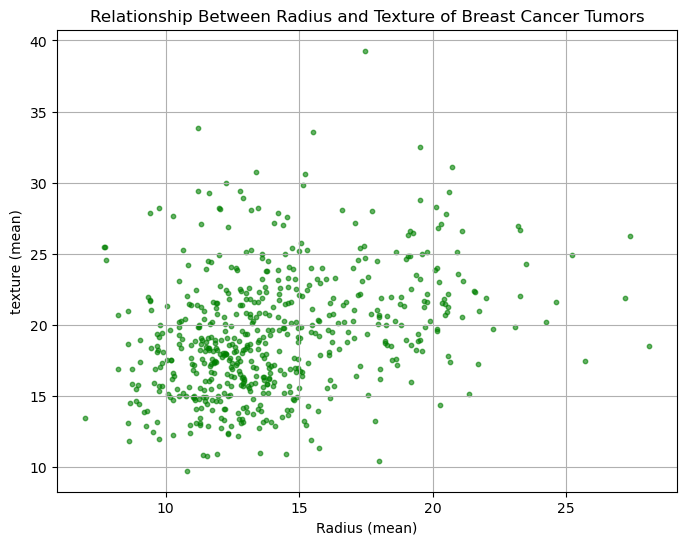

In [9]:
# Robert Shea
# ISM6644 9/27/2025
# Assignment 3

# Load Matplot, Wisonsin Breast Cancer Data Base, and Pandas

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load & Define the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(df['mean radius'], df['mean texture'],
            color='green', s=10, alpha=0.6, marker='o')
plt.title("Relationship Between Radius and Texture of Breast Cancer Tumors")
plt.xlabel("Radius (mean)")
plt.ylabel("texture (mean)")
plt.grid(True)
plt.show()

/var/folders/_b/yfsb48gn7q75p5kz2vq7_20r0000gn/T/ipykernel_19042/163716460.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_radius = df.groupby(['radius_bin', 'target'])['mean radius'].mean().unstack()


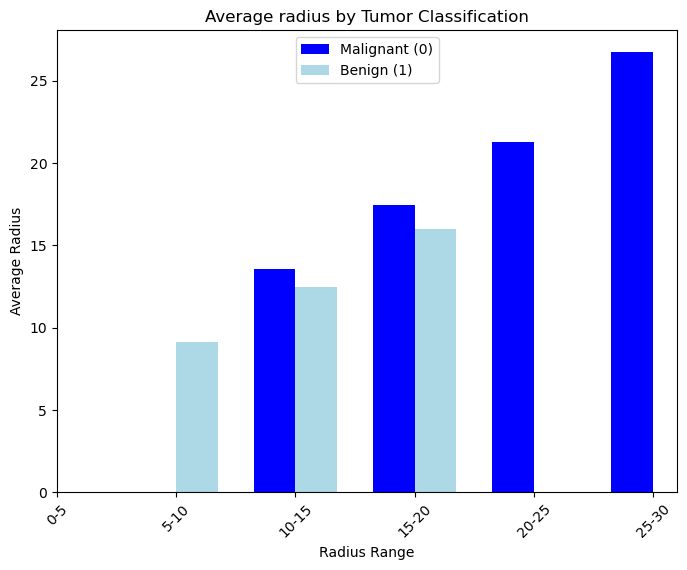

In [16]:
# Now to create a Bar Chart
# Define Bins
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ["0-5","5-10","10-15","15-20","20-25","25-30"]

# Bin Radius Values
df['radius_bin'] = pd.cut(df['mean radius'], bins=bins, labels=labels)

# Compute Average Radius for each tumor type within each bin
avg_radius = df.groupby(['radius_bin', 'target'])['mean radius'].mean().unstack()

# Define and create the bar chart
x = range(len(avg_radius.index))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar([p - width/2 for p in x], avg_radius[0], width=width, color='blue', label='Malignant (0)')
plt.bar([p + width/2 for p in x], avg_radius[1], width=width, color='lightblue', label='Benign (1)')
plt.xticks(x, avg_radius.index, rotation=45)
plt.title("Average radius by Tumor Classification")
plt.xlabel("Radius Range")
plt.ylabel("Average Radius")
plt.legend()
plt.show()

In [ ]:
# Malignant tumors do tend to have a larger average radius than benign tumors.
# Benign tumors cluster more in smaller radius bins under 20.
# This supports the idea that tumor size can help distinguish benign from malignant growths.